In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(filepath)

In [3]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

## Simple Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression # load the modules for linear regression

In [7]:
# Create the linear regression object:
lm = LinearRegression()
lm

LinearRegression()

Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

$$
Yhat = a + b  X
$$

In [10]:
X = df[['highway-mpg']]
Y = df['price']

In [11]:
# Fit the linear model using highway-mpg:
lm.fit(X,Y)

LinearRegression()

In [12]:
# We can output a prediction:
Yhat=lm.predict(X)
Yhat[0:10] 

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682])

In [13]:
# the value of the intercept (a)
lm.intercept_

38423.305858157386

In [14]:
# the value of the slope (b)
lm.coef_

array([-821.73337832])

The final estimated linear model: Price = 38423.31 - 821.73 x highway-mpg

In [16]:
lm1 = LinearRegression()

In [17]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [18]:
lm1.intercept_

array([-7963.33890628])

In [19]:
lm1.coef_

array([[166.86001569]])

In [20]:
price = -7963.34 + 166.86 * df['engine-size']
price

0      13728.46
1      13728.46
2      17399.38
3      10224.40
4      14729.62
         ...   
196    15563.92
197    15563.92
198    20903.44
199    16231.36
200    15563.92
Name: engine-size, Length: 201, dtype: float64

In [21]:
price = lm1.predict(df[['engine-size']]).round(2)
price[0:5]

array([[13728.46],
       [13728.46],
       [17399.38],
       [10224.4 ],
       [14729.62]])

## Multiple Linear Regression

If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression.
From the previous section we know that other good predictors of price could be:
- Horsepower
- Curb-weight
- Engine-size
- Highway-mpg

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

In [25]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [26]:
lm.fit(Z, df['price'])

LinearRegression()

In [27]:
lm.intercept_

-15806.624626329223

In [28]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

Price = -15806.624626329223 + 53.49574423 x horsepower + 4.70770099 x curb-weight + 81.53026382 x engine-size + 36.05748882 x highway-mpg

In [30]:
price = lm.predict(Z).round(2)
price[0:5]

array([13699.11, 13699.11, 19051.65, 10620.36, 15521.31])

In [31]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses', 'highway-mpg']],df['price'])

LinearRegression()

In [32]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [33]:
lm.intercept_

-15806.624626329223

Price = -15806.624626329223 + 1.49789586 x normalized-losses - 820.45434016 x highway-mpg

## Model Evaluation Using Visualization

In [36]:
import seaborn as sns
%matplotlib inline 

### Regression Plot

(0.0, 48176.787352792635)

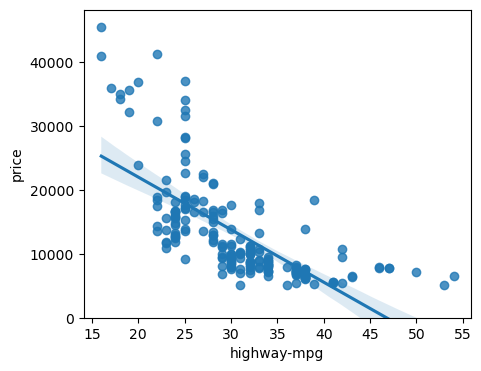

In [38]:
# Let's visualize highway-mpg as potential predictor variable of price:
width = 5
height = 4
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

(0.0, 47414.1)

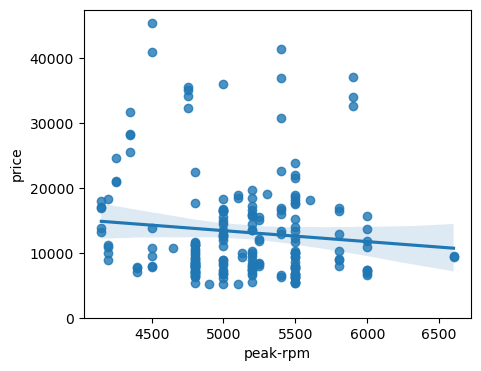

In [40]:
# Let's compare this plot to the regression plot of "peak-rpm".
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

In [42]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616.

### Residual Plot

The difference between the observed value (y) and the predicted value (Yhat) is called the residual. A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis. 
If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

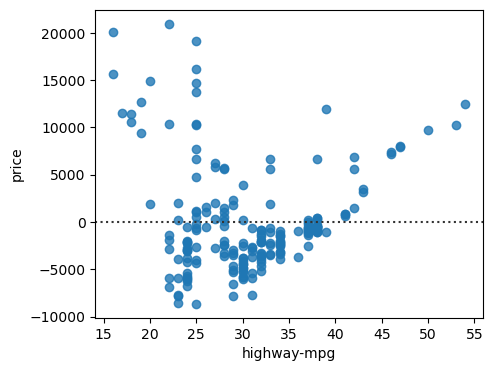

In [46]:
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

### Distribution Plot

How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

First, let's make a prediction:

In [50]:
Y_hat = lm.predict(Z)

C:\Users\annat\AppData\Local\Temp\ipykernel_1856\3208340030.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\annat\AppData\Local\Temp\ipykernel_1856\3208340030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

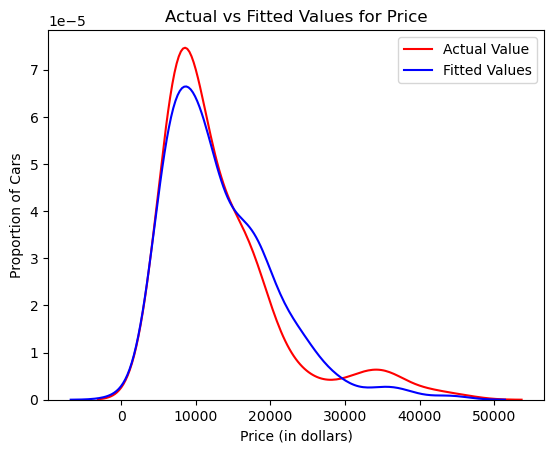

In [51]:
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

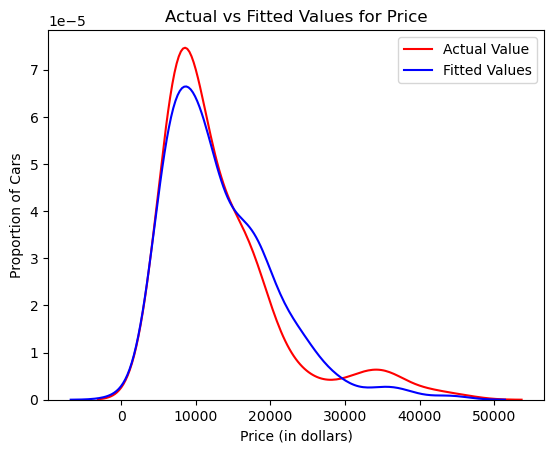

In [53]:
ax1 = sns.kdeplot(df['price'], color="r", label="Actual Value")
sns.kdeplot(Y_hat, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()

plt.show()
plt.close()

# Polynomial Regression and Pipelines

We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\
$$

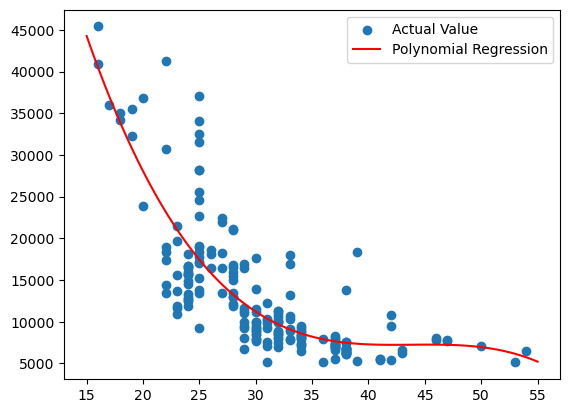

In [57]:
# Данні
x = df['highway-mpg']
y = df['price']

# Підгонка кубічного полінома
f = np.polyfit(x, y, 3)
p = np.poly1d(f)

# Передбачення для нових значень x
x_new = np.linspace(15, 55, 100)
y_new = p(x_new)

# Відображення даних і поліноміальної кривої
plt.scatter(x, y, label='Actual Value')
plt.plot(x_new, y_new, label='Polynomial Regression', color='red')
plt.legend()
plt.show()

This function plots a polynomial regression graph, comparing the actual data with the polynomial model. The actual data points will be represented by dots on the graph, while the polynomial curve will be displayed as a solid line.

In [59]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100) # або np.linspace(min(independent_variable), max(independent_variable), 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price')
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    plt.ylim(0,)
    plt.show()

In [60]:
x = df['highway-mpg']
y = df['price']

In [61]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


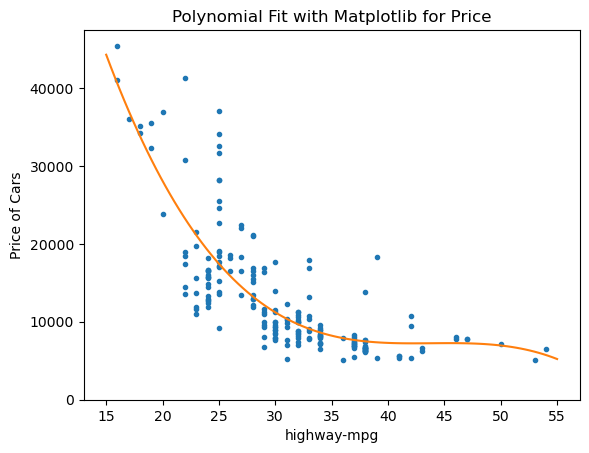

In [62]:
PlotPolly(p, x, y, 'highway-mpg')

We can see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


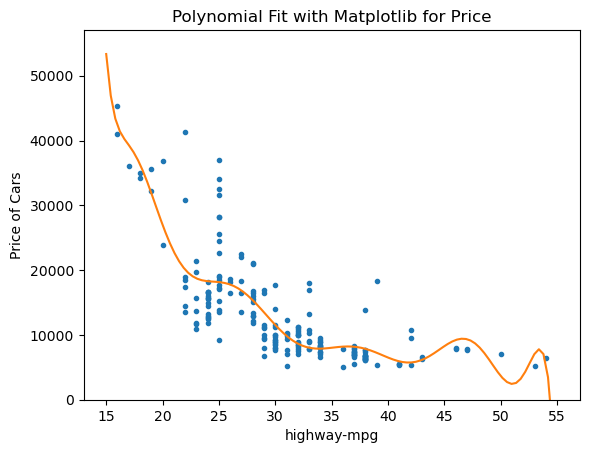

In [64]:
# Here we use a polynomial of the 11rd order
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1, x, y, 'highway-mpg')

The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

In [67]:
# We can perform a polynomial transform on multiple features. First, we import the module:
from sklearn.preprocessing import PolynomialFeatures

In [68]:
# We create a PolynomialFeatures object of degree 2:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [69]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [70]:
Z_pr=pr.fit_transform(Z) # перетворює набір ознак Z у новий набір поліноміальних ознак

In [71]:
# In the original data, there are 201 samples and 4 features.
Z.shape

(201, 4)

In [72]:
# After the transformation, there are 201 samples and 15 features.
Z_pr.shape

(201, 15)

## Pipeline

Data Pipelines simplify the steps of processing the data.

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [76]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [77]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [79]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [80]:
ypipe=pipe.predict(Z)
ypipe[0:10]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385])

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  9656613.4039896
R^2 for multi-variable polynomial pipeline is:  0.8463341969864728


In [82]:
Input1=[('polynomial', PolynomialFeatures(degree=2)), ('scale',StandardScaler()), ('model',LinearRegression())]
pipe1=Pipeline(Input1)
pipe1

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('scale', StandardScaler()), ('model', LinearRegression())])

In [83]:
pipe1.fit(Z,y)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('scale', StandardScaler()), ('model', LinearRegression())])

In [84]:
ypipe1=pipe1.predict(Z)
ypipe1[0:10]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385])

In [85]:
# Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.
Input2=[('scale',StandardScaler()),('model',LinearRegression())]

pipe2=Pipeline(Input2)

pipe2.fit(Z,y)

ypipe2=pipe2.predict(Z)
ypipe2[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [86]:
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe2))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe2))

MSE for multi-variable polynomial pipeline is:  11980366.87072649
R^2 for multi-variable polynomial pipeline is:  0.8093562806577457


# Measures for In-Sample Evaluation

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.value (ŷ).

R-squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line. The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).

### Model 1: Simple Linear Regression

In [92]:
X = df[['highway-mpg']]
Y = df['price']
# Fit the linear model using highway-mpg:
lm.fit(X,Y)

LinearRegression()

In [93]:
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


We can say that ~49.66% of the variation of the price is explained by this simple linear model.

In [95]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [96]:
# Let's import the function mean_squared_error from the module metrics:
from sklearn.metrics import mean_squared_error

In [97]:
# We can compare the predicted results with the actual results:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


### Model 2: Multiple Linear Regression

In [99]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that ~80.94% of the variation of price is explained by this multiple linear regression.

In [101]:
mse = mean_squared_error(df['price'], lm.predict(Z))
print('The mean square error of price and predicted value using multifit is: ', mse)

The mean square error of price and predicted value using multifit is:  11980366.87072649


#### Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)

In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model:
- the model with the higher R-squared value is a better fit for the data
- the model with the smallest MSE value is a better fit for the data

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

### Model 3: Polynomial Fit

In [106]:
from sklearn.metrics import r2_score

In [107]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


We can say that ~67.42% of the variation of price is explained by this polynomial fit.

In [109]:
mean_squared_error(df['price'], p(x))

20474146.426361207

Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.

### Conclusion

Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.

# Prediction

In [114]:
# Create a new input:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [115]:
lm.fit(X, Y)
lm

LinearRegression()

In [116]:
yhat=lm.predict(new_input)
yhat[0:5]

C:\Users\annat\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

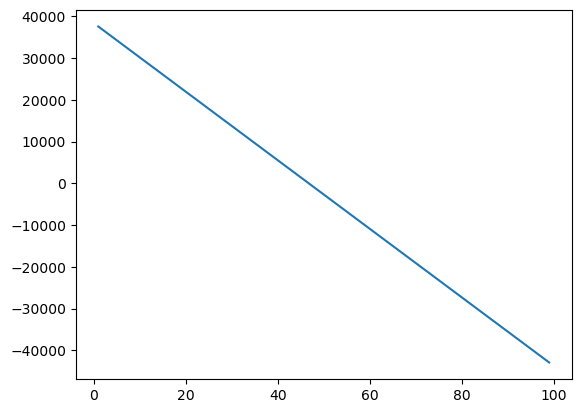

In [117]:
plt.plot(new_input, yhat)
plt.show()